## 1 Data Preprocessing

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(color_codes=True) #seaborn theme colour variations 
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from numpy import array
from pandas.plotting import scatter_matrix

In [2]:
#Loading dataset and displaying the first 5 rows of the entire data.
df=pd.read_csv('covid_results.csv')
df.head()

,id,Archieve Date,ID_Registration,Hospital location,Patient residence,covid_test_result,delay,region residence,States,State Abreviation,...,Hypertension,Other diseases,Cardiovascular,Obesity,Chronic kidney,Smoking addiction,Another case,Migrant,Country of origin,ICU
0,9269,12/04/2020,00011f,25,25,2,0,25,Sinaloa,SL,...,1,2,2,1,2,2,2,99,97,97
1,33333,12/04/2020,00014e,14,14,2,0,14,Jalisco,JC,...,1,2,2,1,2,1,99,99,97,2
2,35483,12/04/2020,153,8,8,1,0,8,Chihuahua,CH,...,2,2,2,2,2,2,99,99,97,2
3,7062,12/04/2020,0001b6,9,15,1,0,9,Ciudad de Mexico,DF,...,2,2,2,1,2,2,99,99,97,97
4,23745,12/04/2020,0001c1,9,9,2,0,9,Ciudad de Mexico,DF,...,2,2,2,2,2,2,99,99,97,97


In [3]:
#Droping irrelevant columns
df.drop(['Another case', 'Migrant'], axis=1)

,id,Archieve Date,ID_Registration,Hospital location,Patient residence,covid_test_result,delay,region residence,States,State Abreviation,...,Asthma,immunosuppressed,Hypertension,Other diseases,Cardiovascular,Obesity,Chronic kidney,Smoking addiction,Country of origin,ICU
0,9269,12/04/2020,00011f,25,25,2,0,25,Sinaloa,SL,...,2,2,1,2,2,1,2,2,97,97
1,33333,12/04/2020,00014e,14,14,2,0,14,Jalisco,JC,...,2,2,1,2,2,1,2,1,97,2
2,35483,12/04/2020,153,8,8,1,0,8,Chihuahua,CH,...,2,2,2,2,2,2,2,2,97,2
3,7062,12/04/2020,0001b6,9,15,1,0,9,Ciudad de Mexico,DF,...,2,2,2,2,2,1,2,2,97,97
4,23745,12/04/2020,0001c1,9,9,2,0,9,Ciudad de Mexico,DF,...,2,2,2,2,2,2,2,2,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263002,7094887,03/06/2020,1e019c,32,32,1,0,32,Zacatecas,ZS,...,2,2,2,2,2,2,2,2,99,97
263003,7053721,03/06/2020,1e2b05,12,12,1,0,12,Guerrero,GR,...,2,2,2,2,2,1,2,2,99,2
263004,7055429,03/06/2020,1e473f,20,20,1,0,20,Oaxaca,OC,...,2,2,1,2,2,2,1,2,99,2
263005,7043768,03/06/2020,1e6da1,13,13,1,0,13,Hidalgo,HG,...,2,2,1,2,2,2,2,2,99,2


In [4]:
#Displaying the first 5 rows of the dataset
df.head()

,id,Archieve Date,ID_Registration,Hospital location,Patient residence,covid_test_result,delay,region residence,States,State Abreviation,...,Hypertension,Other diseases,Cardiovascular,Obesity,Chronic kidney,Smoking addiction,Another case,Migrant,Country of origin,ICU
0,9269,12/04/2020,00011f,25,25,2,0,25,Sinaloa,SL,...,1,2,2,1,2,2,2,99,97,97
1,33333,12/04/2020,00014e,14,14,2,0,14,Jalisco,JC,...,1,2,2,1,2,1,99,99,97,2
2,35483,12/04/2020,153,8,8,1,0,8,Chihuahua,CH,...,2,2,2,2,2,2,99,99,97,2
3,7062,12/04/2020,0001b6,9,15,1,0,9,Ciudad de Mexico,DF,...,2,2,2,1,2,2,99,99,97,97
4,23745,12/04/2020,0001c1,9,9,2,0,9,Ciudad de Mexico,DF,...,2,2,2,2,2,2,99,99,97,97


In [5]:
#Summary of the data statistics
df.describe()

,id,Hospital location,Patient residence,covid_test_result,delay,region residence,Source,Health sector type,Sex,birth region,...,immunosuppressed,Hypertension,Other diseases,Cardiovascular,Obesity,Chronic kidney,Smoking addiction,Another case,Migrant,ICU
count,2.630070e+05,263007.000000,263007.000000,263007.000000,263007.0,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,...,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000
mean,2.946176e+06,14.844601,15.127719,1.609672,0.0,15.092271,1.635789,9.601680,1.510682,19.691004,...,2.359667,2.174185,2.453961,2.324980,2.184763,2.320231,2.268217,32.283764,98.593680,74.541012
std,2.212368e+06,8.001043,7.904314,0.487825,0.0,7.915406,0.481209,7.265468,0.499887,19.378113,...,6.021830,5.745114,6.850231,5.796086,5.817362,5.722995,5.867586,45.350310,6.275497,40.384991
min,1.000000e+00,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.689635e+05,9.000000,9.000000,1.000000,0.0,9.000000,1.000000,4.000000,1.000000,9.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,99.000000,97.000000
50%,2.733242e+06,14.000000,15.000000,2.000000,0.0,15.000000,2.000000,12.000000,2.000000,15.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,97.000000
75%,4.789668e+06,21.000000,21.000000,2.000000,0.0,21.000000,2.000000,12.000000,2.000000,24.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,99.000000,97.000000
max,7.277125e+06,32.000000,32.000000,2.000000,0.0,32.000000,2.000000,99.000000,2.000000,99.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,99.000000,99.000000


In [6]:
#The total number of rows and colunms
df.shape

(263007, 40)

In [7]:
#Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263007 entries, 0 to 263006
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   263007 non-null  int64  
 1   Archieve Date        263007 non-null  object 
 2   ID_Registration      263007 non-null  object 
 3   Hospital location    263007 non-null  int64  
 4   Patient residence    263007 non-null  int64  
 5   covid_test_result    263007 non-null  int64  
 6   delay                263007 non-null  int64  
 7   region residence     263007 non-null  int64  
 8   States               263007 non-null  object 
 9   State Abreviation    263007 non-null  object 
 10  Date Update          263007 non-null  object 
 11  Source               263007 non-null  int64  
 12  Health sector type   263007 non-null  int64  
 13  Sex                  263007 non-null  int64  
 14  birth region         263007 non-null  int64  
 15  City/Town        

In [8]:
#Number the duplicated rows
df.duplicated().sum()

0

In [9]:
#Displaying unique values in a row
df.nunique()

id                     263007
Archieve Date              53
ID_Registration        261947
Hospital location          32
Patient residence          32
covid_test_result           2
delay                       1
region residence           32
States                     32
State Abreviation          32
Date Update                46
Source                      2
Health sector type         14
Sex                         2
birth region               33
City/Town                 359
Patient type                2
Admission date            155
Symptom_date              154
Patients death date        88
Intubation                  4
Pneumonia                   3
Age                       117
Nationality                 2
Pregnancy                   4
Speak language              3
Diabetes                    3
Copd                        3
Asthma                      3
immunosuppressed            3
Hypertension                3
Other diseases              3
Cardiovascular              3
Obesity   

In [10]:
#Feature selection
df=df[['covid_test_result','Sex','Patient type','Intubation','Pneumonia','Age','Diabetes','Copd','Asthma','Pregnancy','immunosuppressed','Hypertension','Other diseases','Cardiovascular','Obesity','Chronic kidney','Smoking addiction','ICU']]

In [11]:
#checking datatypes
df.dtypes

covid_test_result    int64
Sex                  int64
Patient type         int64
Intubation           int64
Pneumonia            int64
Age                  int64
Diabetes             int64
Copd                 int64
Asthma               int64
Pregnancy            int64
immunosuppressed     int64
Hypertension         int64
Other diseases       int64
Cardiovascular       int64
Obesity              int64
Chronic kidney       int64
Smoking addiction    int64
ICU                  int64
dtype: object

In [12]:
#checking for null values
print (df.isnull ().sum())

covid_test_result    0
Sex                  0
Patient type         0
Intubation           0
Pneumonia            0
Age                  0
Diabetes             0
Copd                 0
Asthma               0
Pregnancy            0
immunosuppressed     0
Hypertension         0
Other diseases       0
Cardiovascular       0
Obesity              0
Chronic kidney       0
Smoking addiction    0
ICU                  0
dtype: int64


# 2 Exploratory data analysis

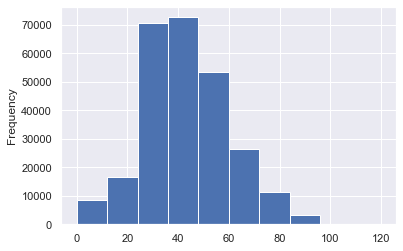

In [13]:
#visualing age of patients that are most affected
df["Age"].plot.hist()

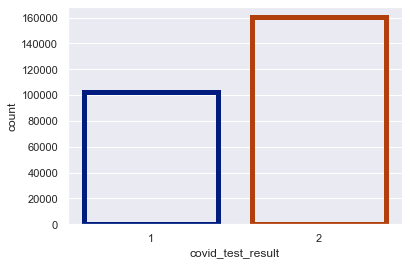

In [14]:
#Visualising the percentage of those tested for covid-19 
#where 1 represnts postive result and 2 represents negative results
ax = sns.countplot(x="covid_test_result", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
plt.show()

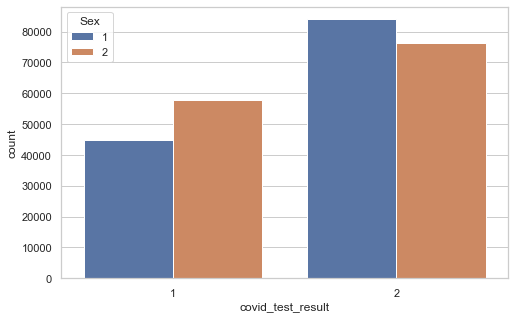

In [15]:
#Visualising the sex of patients while counting those tested positive and negative to covid-19
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="covid_test_result", hue="Sex", data=df)

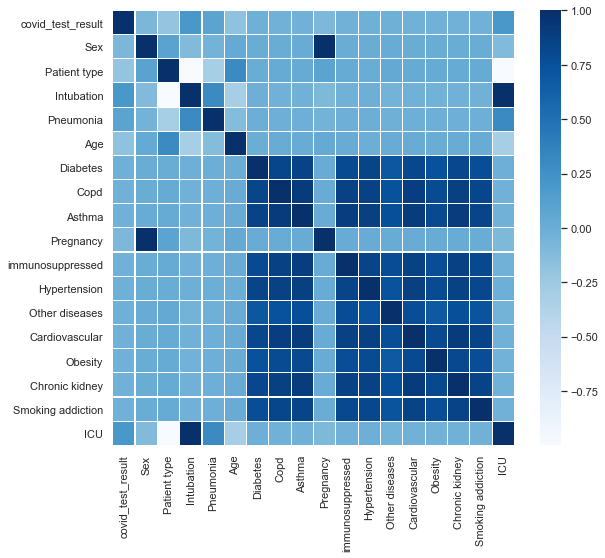

In [16]:
#correlation matrix with heatmap
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax=ax, cmap='Blues', linewidths = 0.1)

In [17]:
# Dependent variable from the dataset
y = df['covid_test_result'].values

In [18]:
# Feature selection
X=df[['Sex','Patient type','Intubation','Pneumonia','Age','Diabetes','Copd','Asthma','Pregnancy','immunosuppressed','Hypertension','Other diseases','Cardiovascular','Obesity','Chronic kidney','Smoking addiction','ICU']]

In [19]:
y

array([2, 2, 1, ..., 1, 1, 1], dtype=int64)

In [20]:
# Independent variables from the dataset
X

,Sex,Patient type,Intubation,Pneumonia,Age,Diabetes,Copd,Asthma,Pregnancy,immunosuppressed,Hypertension,Other diseases,Cardiovascular,Obesity,Chronic kidney,Smoking addiction,ICU
0,2,1,97,2,74,1,2,2,97,2,1,2,2,1,2,2,97
1,1,2,2,2,71,1,1,2,2,2,1,2,2,1,2,1,2
2,2,2,2,1,50,2,2,2,97,2,2,2,2,2,2,2,2
3,1,1,97,2,25,2,2,2,2,2,2,2,2,1,2,2,97
4,1,1,97,2,28,2,2,2,2,2,2,2,2,2,2,2,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263002,2,1,97,2,39,2,2,2,97,2,2,2,2,2,2,2,97
263003,1,2,2,1,53,1,1,2,2,2,2,2,2,1,2,2,2
263004,1,2,2,2,65,1,2,2,2,2,1,2,2,2,1,2,2
263005,2,2,2,1,71,2,2,2,97,2,1,2,2,2,2,2,2


In [21]:
#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (210405, 17) (210405,)
Test set: (52602, 17) (52602,)


In [22]:
y_test

array([2, 1, 2, ..., 2, 2, 1], dtype=int64)

# 3. Modelling

## Modelling using Imbalanced dataset

In [23]:
#importing classifiers from libraries 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [24]:
#Using decision tree classifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(X_train,y_train)
DT_model

# Model evaluation of decision tree
y_pred = DT_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.32      0.42     20406
           2       0.67      0.88      0.76     32196

    accuracy                           0.66     52602
   macro avg       0.65      0.60      0.59     52602
weighted avg       0.65      0.66      0.63     52602



In [25]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 6545, 13861],
       [ 3985, 28211]], dtype=int64)

In [26]:
#Using logistic regression
LR_model = LogisticRegression(max_iter=1000).fit(X_train,y_train)
LR_model

# Model Evaluation of Logistic Regression
y_pred = LR_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.31      0.41     20406
           2       0.67      0.88      0.76     32196

    accuracy                           0.66     52602
   macro avg       0.64      0.59      0.58     52602
weighted avg       0.65      0.66      0.62     52602



In [27]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 6275, 14131],
       [ 3924, 28272]], dtype=int64)

In [28]:
# Using Random forest Classifier
rfc_model = RandomForestClassifier().fit(X_train,y_train)
rfc_model

# Model Evaluation of Random Forest Classifier
y_pred = rfc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.32      0.42     20406
           2       0.67      0.86      0.75     32196

    accuracy                           0.65     52602
   macro avg       0.63      0.59      0.59     52602
weighted avg       0.64      0.65      0.62     52602



In [29]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 6583, 13823],
       [ 4423, 27773]], dtype=int64)

# Data balancing using oversampling approach 

In [30]:
#importing Imbalanced-learn samplers from libraries 
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state=42)
X_train_Over, y_train_Over = ros.fit_resample(X_train, y_train)

In [31]:
#Using Decision Tree
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(X_train_Over, y_train_Over)
DT_model

# Model Evaluation of Decision Tree
y_pred = DT_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.61      0.35      0.45     20406
           2       0.68      0.85      0.75     32196

    accuracy                           0.66     52602
   macro avg       0.64      0.60      0.60     52602
weighted avg       0.65      0.66      0.63     52602



In [32]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 7204, 13202],
       [ 4694, 27502]], dtype=int64)

In [33]:
# Using logistic regression
LR_model = LogisticRegression(max_iter=1000).fit(X_train_Over, y_train_Over)
LR_model

# Model Evaluation of Logistic Regression
y_pred = LR_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.53      0.48      0.51     20406
           2       0.69      0.73      0.71     32196

    accuracy                           0.63     52602
   macro avg       0.61      0.61      0.61     52602
weighted avg       0.63      0.63      0.63     52602



In [34]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 9882, 10524],
       [ 8817, 23379]], dtype=int64)

In [35]:
# Using Random forest Classifier
rfc_model = RandomForestClassifier().fit(X_train_Over, y_train_Over)
rfc_model

# Model Evaluation of Random Forest Classifier
y_pred = rfc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.45      0.49     20406
           2       0.68      0.76      0.72     32196

    accuracy                           0.64     52602
   macro avg       0.61      0.60      0.60     52602
weighted avg       0.63      0.64      0.63     52602



In [36]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 9117, 11289],
       [ 7805, 24391]], dtype=int64)

# Data balancing using undersampling approach 

In [37]:
#importing imbalanced-learn samplers from libraries
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=21)
X_train_Under, y_train_Under= rus.fit_sample(X_train, y_train)

In [38]:
#Using Decision Tree
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(X_train_Under, y_train_Under)
DT_model

# Model Evaluation of Decision Tree
y_pred = DT_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.36      0.45     20406
           2       0.68      0.85      0.75     32196

    accuracy                           0.66     52602
   macro avg       0.64      0.60      0.60     52602
weighted avg       0.65      0.66      0.63     52602



In [39]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 7336, 13070],
       [ 4945, 27251]], dtype=int64)

In [40]:
# Using logistic regression
LR_model = LogisticRegression(max_iter=1000).fit(X_train_Under, y_train_Under)
LR_model

# Model Evaluation of Logistic Regression
y_pred = LR_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.53      0.48      0.50     20406
           2       0.69      0.73      0.71     32196

    accuracy                           0.63     52602
   macro avg       0.61      0.60      0.61     52602
weighted avg       0.63      0.63      0.63     52602



In [41]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 9851, 10555],
       [ 8785, 23411]], dtype=int64)

In [42]:
# Using Randon forest Classifier
rfc_model = RandomForestClassifier().fit(X_train_Under, y_train_Under)
rfc_model

# Model Evaluation of Random Forest Classifier
y_pred = rfc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.53      0.47      0.50     20406
           2       0.69      0.74      0.71     32196

    accuracy                           0.63     52602
   macro avg       0.61      0.60      0.61     52602
weighted avg       0.63      0.63      0.63     52602



In [43]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 9595, 10811],
       [ 8435, 23761]], dtype=int64)